In [46]:
import bettools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
season_list = bettools.generate_seasons(2013,2024)

league_list = ['E0', 'E1', 'E2', 'E3']

col_list = ['Div','Date','HomeTeam','AwayTeam','HF','AF','Referee']

main_df = pd.concat(bettools.get_data(season_list, league_list, col_list))

main_df['AF'] = main_df['AF'].replace(77, 7)

main_df['total_fouls'] = main_df['HF'] + main_df['AF']

main_df.reset_index(drop=True, inplace=True)

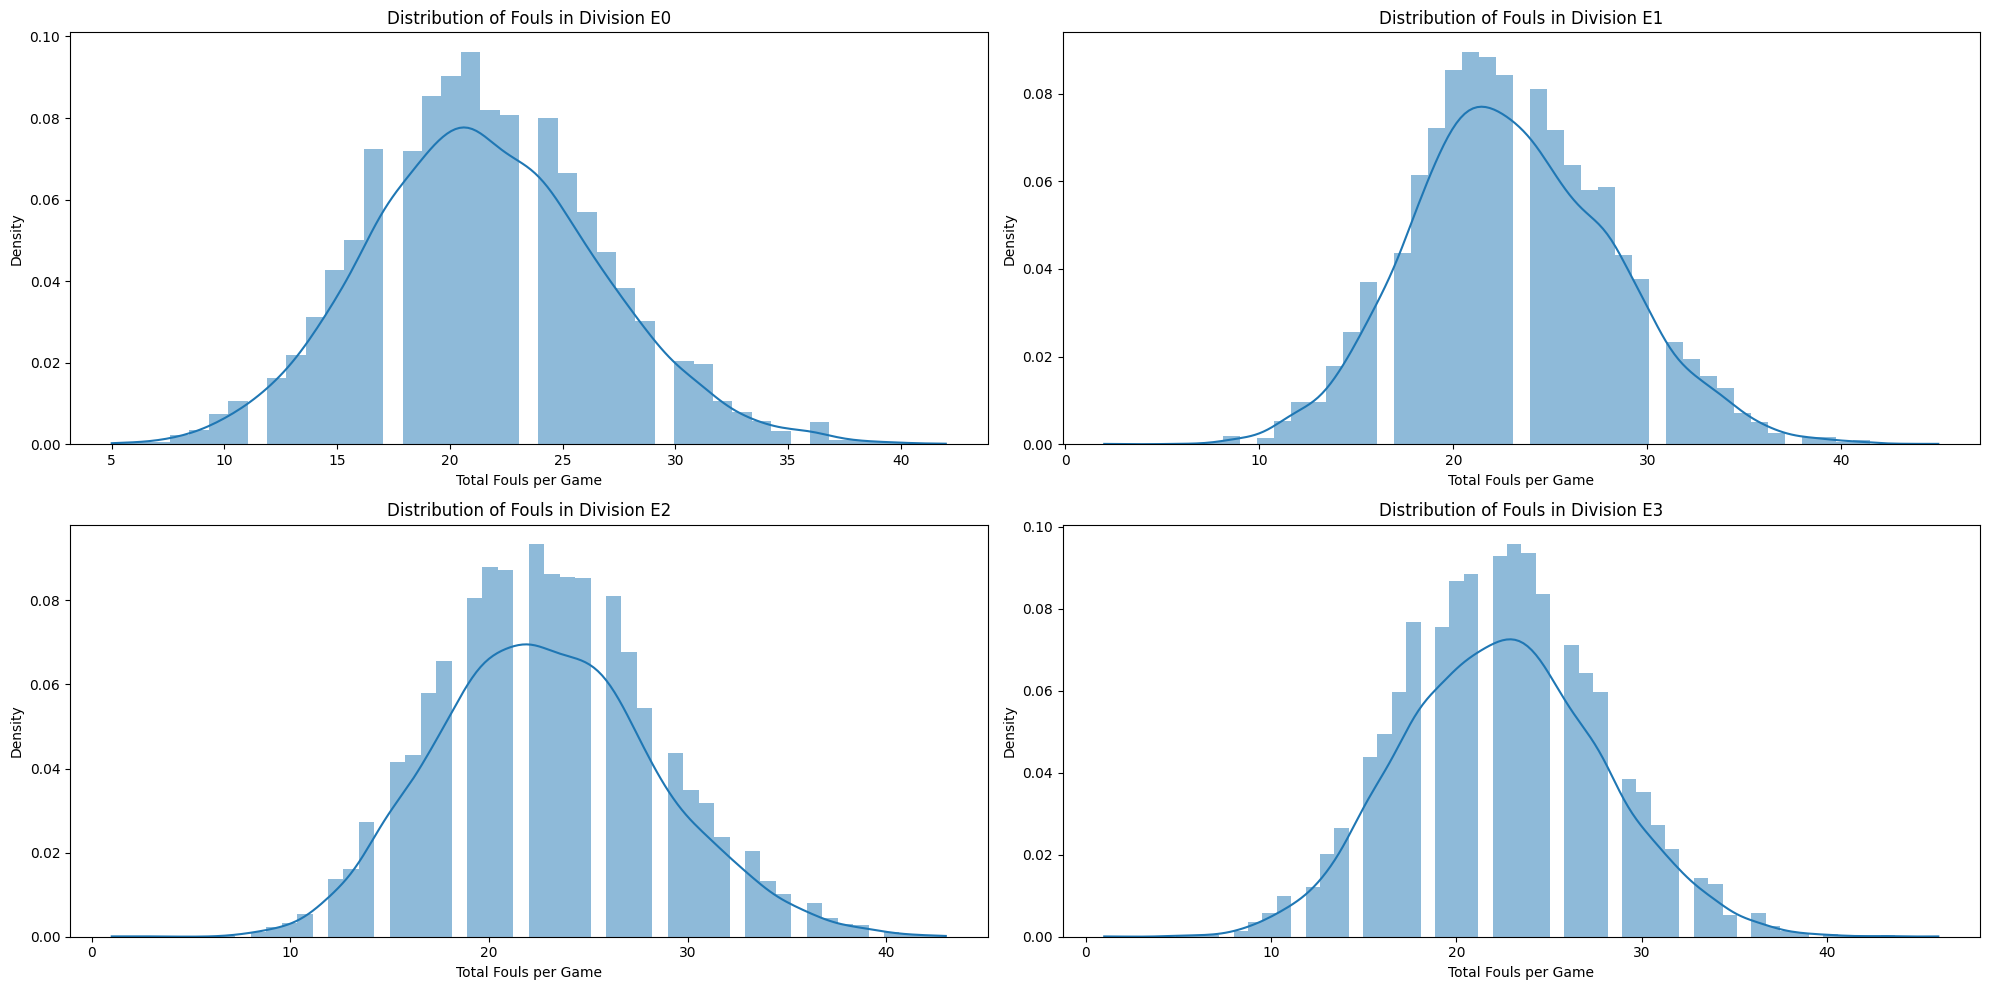

In [62]:
grouped_data = main_df.groupby('Div')['total_fouls'].apply(list).reset_index()

# Plotting
plt.figure(figsize=(20, 10))
for i, division in enumerate(grouped_data['Div']):
    plt.subplot(2, 2, i+1)
    sns.histplot(grouped_data[grouped_data['Div'] == division]['total_fouls'].iloc[0], kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of Fouls in Division {division}')
    plt.xlabel('Total Fouls per Game')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


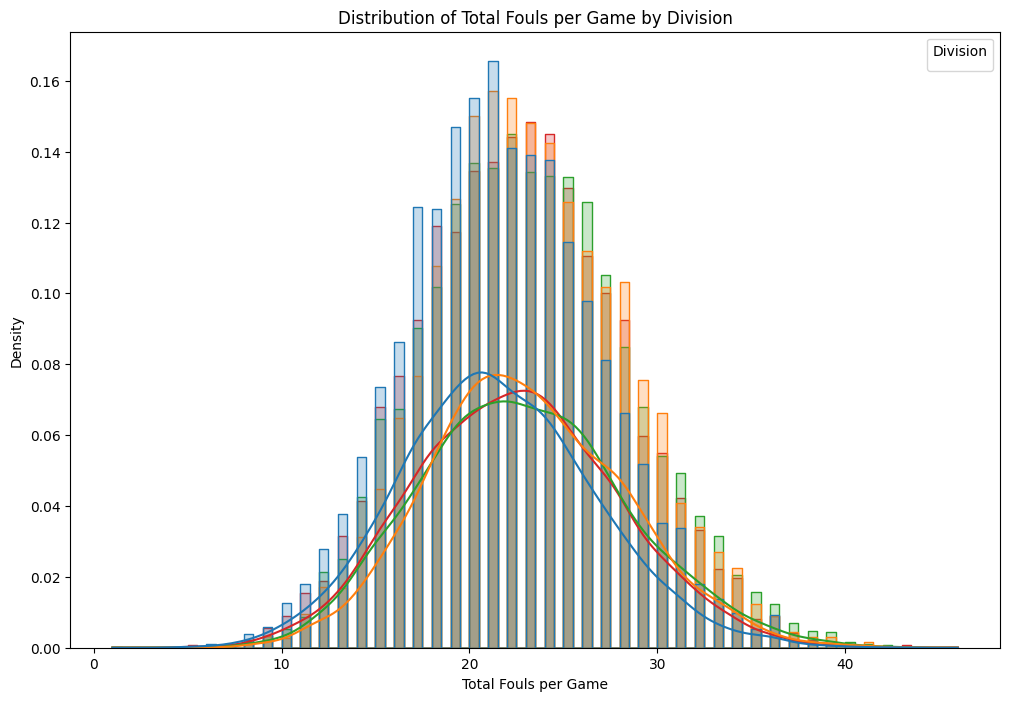

In [63]:
melted_data = main_df.melt(id_vars=['Div', 'Date', 'HomeTeam', 'AwayTeam', 'Referee'], value_vars=['total_fouls'], var_name='Metric', value_name='Fouls')

plt.figure(figsize=(12, 8))
sns.histplot(data=melted_data, x='Fouls', hue='Div', kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Total Fouls per Game by Division')
plt.xlabel('Total Fouls per Game')
plt.ylabel('Density')
plt.legend(title='Division')
plt.show()

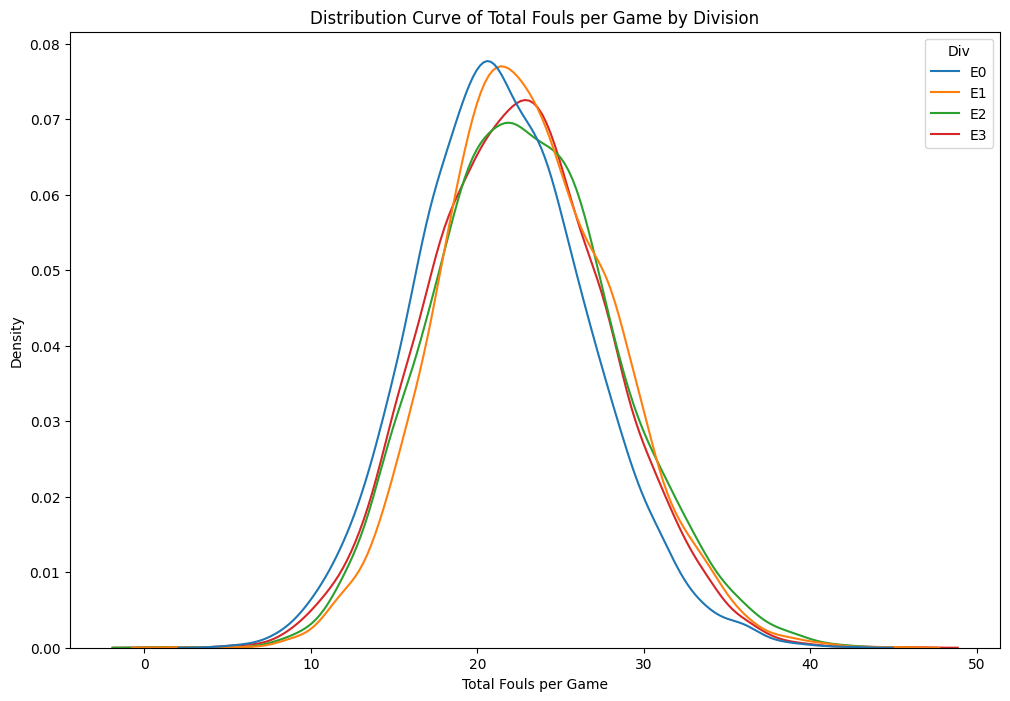

In [64]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=main_df, x='total_fouls', hue='Div', common_norm=False)
plt.title('Distribution Curve of Total Fouls per Game by Division')
plt.xlabel('Total Fouls per Game')
plt.ylabel('Density')
plt.show()

In [47]:
leicester_df = main_df[(main_df['HomeTeam']=='Leicester')|(main_df['AwayTeam']=='Leicester')]

leicester_df['team_fouls'] = np.where(leicester_df['HomeTeam']=='Leicester', leicester_df['HF'], leicester_df['AF'])

/var/folders/zc/1tcx3nz15bq90l7txyt70n4r0000gn/T/ipykernel_51326/2672094793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leicester_df['team_fouls'] = np.where(leicester_df['HomeTeam']=='Leicester', leicester_df['HF'], leicester_df['AF'])


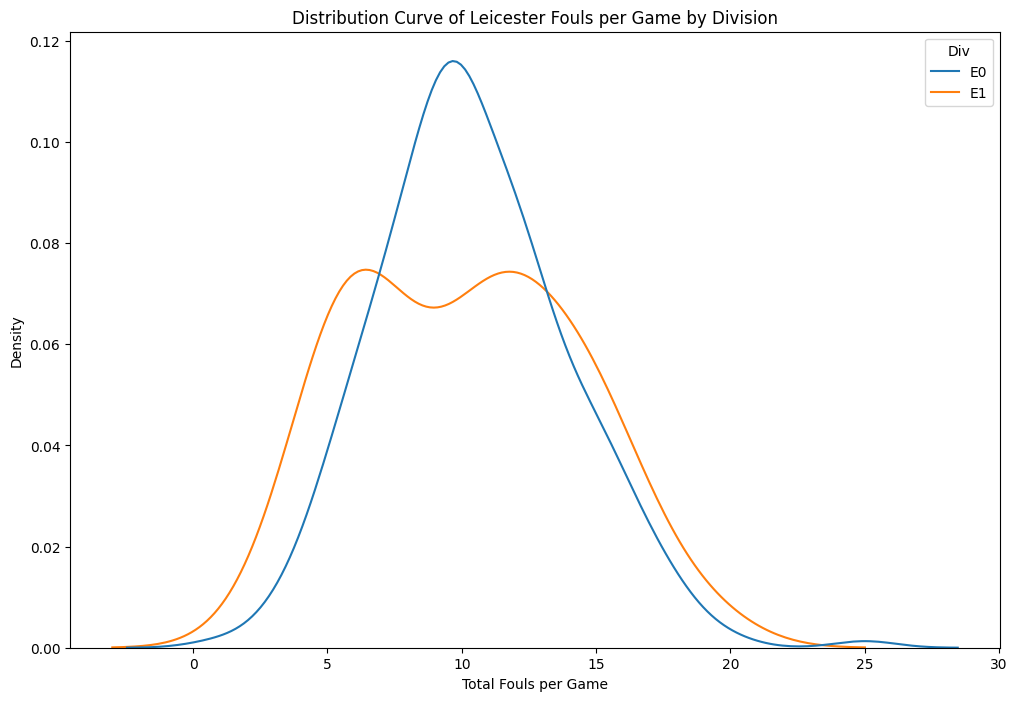

In [50]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=leicester_df, x='team_fouls', hue='Div', common_norm=False)
plt.title('Distribution Curve of Leicester Fouls per Game by Division')
plt.xlabel('Total Fouls per Game')
plt.ylabel('Density')
plt.show()

/var/folders/zc/1tcx3nz15bq90l7txyt70n4r0000gn/T/ipykernel_51326/3600012652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norwich_df['team_fouls'] = np.where(norwich_df['HomeTeam']=='Norwich', norwich_df['HF'], norwich_df['AF'])


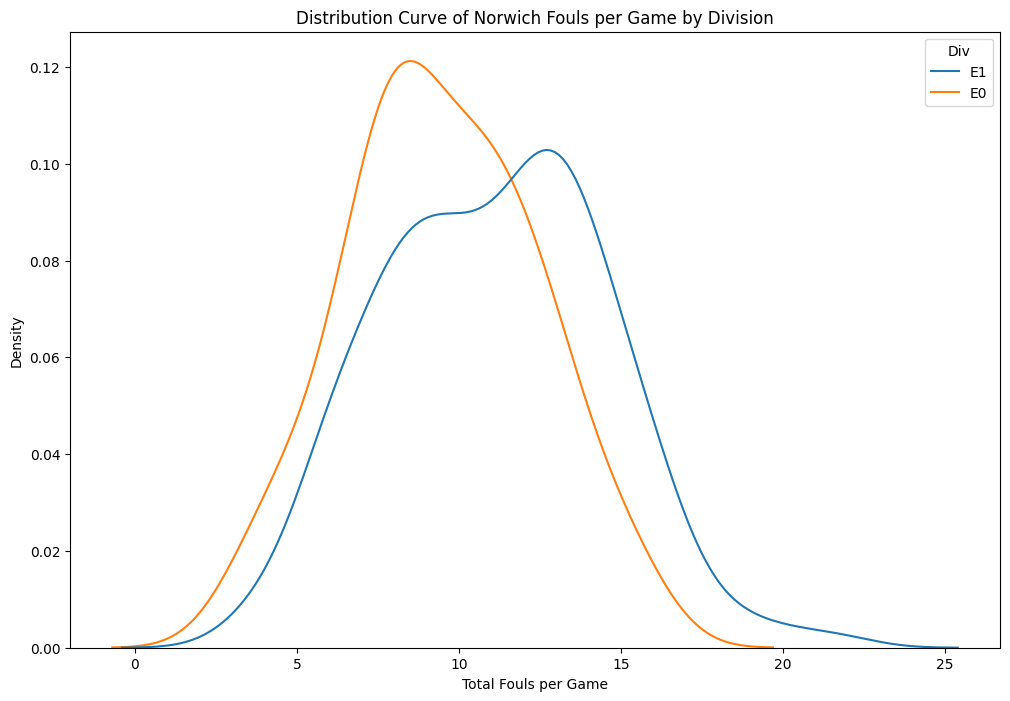

In [54]:
norwich_df = main_df[(main_df['HomeTeam']=='Norwich')|(main_df['AwayTeam']=='Norwich')]
norwich_df['team_fouls'] = np.where(norwich_df['HomeTeam']=='Norwich', norwich_df['HF'], norwich_df['AF'])
plt.figure(figsize=(12, 8))
sns.kdeplot(data=norwich_df, x='team_fouls', hue='Div', common_norm=False)
plt.title('Distribution Curve of Norwich Fouls per Game by Division')
plt.xlabel('Total Fouls per Game')
plt.ylabel('Density')
plt.show()

In [66]:
std_dev = main_df.groupby('Div')['total_fouls'].std().reset_index(name='Standard Deviation')

# Calculating the IQR for total fouls per game by division
iqr_values = main_df.groupby('Div')['total_fouls'].quantile([0.25, 0.75]).unstack()
iqr_values['IQR'] = iqr_values[0.75] - iqr_values[0.25]
iqr_values.reset_index(inplace=True)
iqr_values.rename(columns={0.25: '25th Percentile', 0.75: '75th Percentile'}, inplace=True)

# Merging standard deviation and IQR values
distribution_width = pd.merge(std_dev, iqr_values, on='Div', how='inner')

# Displaying the distribution width metrics
print(distribution_width)

  Div  Standard Deviation  25th Percentile  75th Percentile  IQR
0  E0            5.183321             18.0             25.0  7.0
1  E1            5.208487             19.0             27.0  8.0
2  E2            5.516655             19.0             26.0  7.0
3  E3            5.382604             19.0             26.0  7.0
